In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/민지/Downloads/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
X = data.drop(['Outcome'], axis =1)
y = data['Outcome']

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(30,input_shape=(8,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,122
Trainable params: 1,122
Non-trainable params: 0
_________________________________________________________________


C:\anaconda_new\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 1.4303 - accuracy: 0.5733 - val_loss: 0.6567 - val_accuracy: 0.6948
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.6401 - val_loss: 0.6263 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6401 - val_loss: 0.6205 - val_accuracy: 0.6948
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6401 - val_loss: 0.6221 - val_accuracy: 0.6948
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.6401 - val_loss: 0.6260 - val_accuracy: 0.6948
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.6401 - val_loss: 0.6211 - val_accuracy: 0.6948
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6401 - val_loss: 0.6200 - val_accuracy: 0.6948
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.6401 - val_loss: 0.6176 - val_accuracy: 0.6948
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6547 - accuracy: 0.6401 - val_loss: 0.6283 - val_accuracy: 0.6948
Epoch 61/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6401 - val_loss: 0.6235 - val_accuracy: 0.6948
Epoch 62/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.6401 - val_loss: 0.6202 - val_accuracy: 0.6948
Epoch 63/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.6401 - val_loss: 0.6223 - val_accuracy: 0.6948
Epoch 64/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6401 - val_loss: 0.6220 - val_accuracy: 0.6948
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6538 - accuracy: 0.6401 - val_loss: 0.6244 - val_accuracy: 0.6948
Epoch 

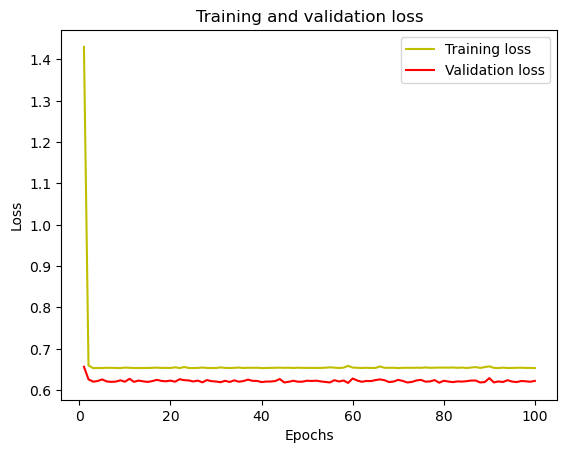

In [7]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

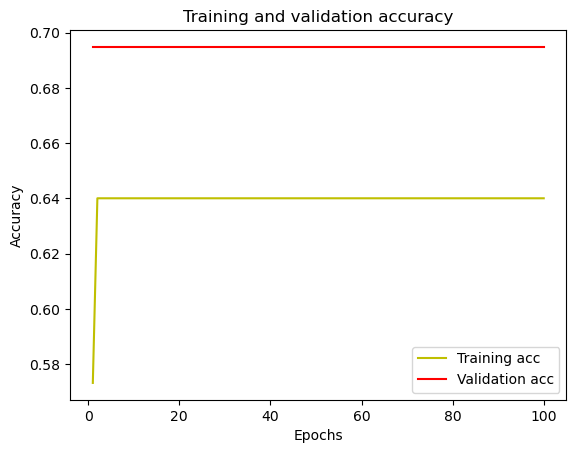

In [8]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()